1. Performing EDA. Checking if data is balanced.

Shape of the dataset: (284807, 31)

Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

First 5 rows:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -

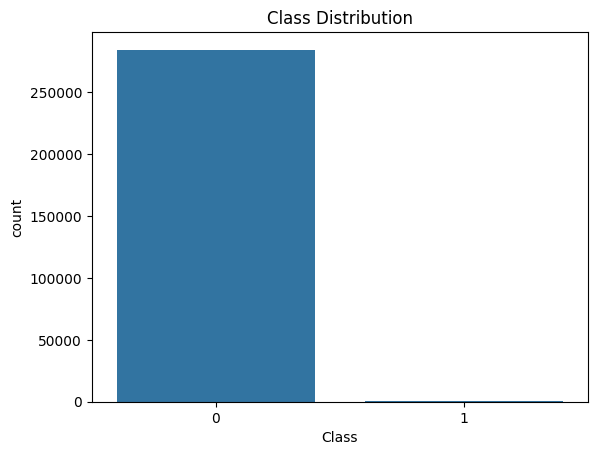

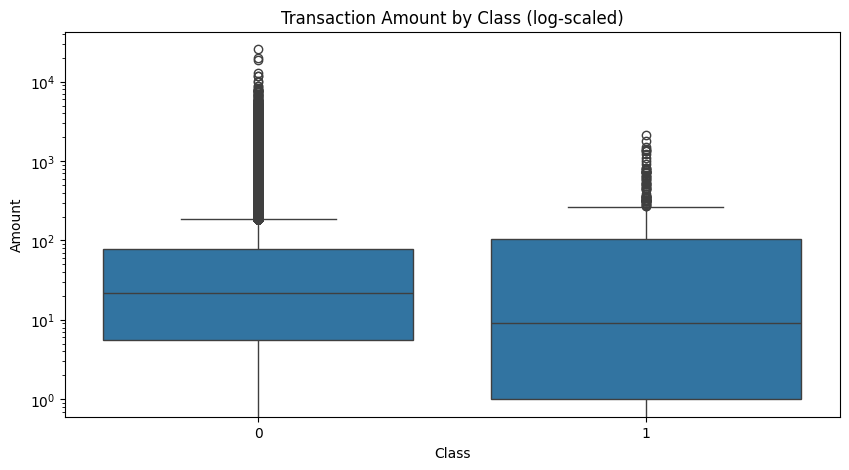

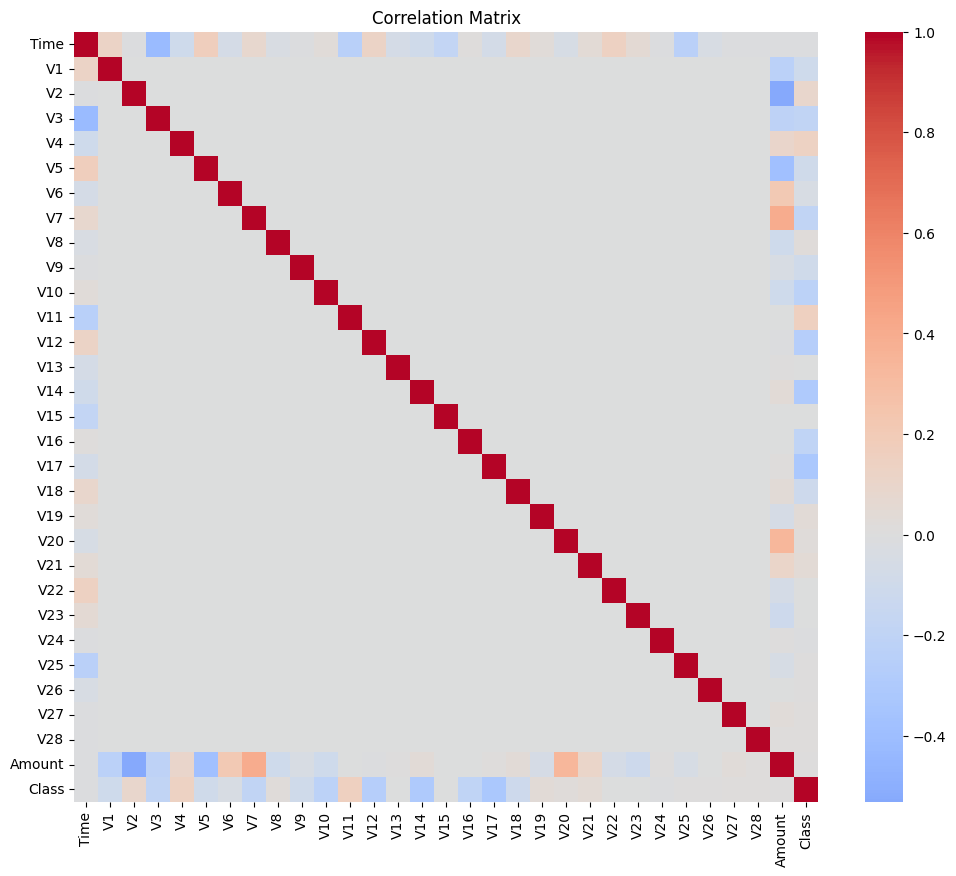

Class Counts:
 Class
0    284315
1       492
Name: count, dtype: int64
Class Ratio:
 Class
0    0.998273
1    0.001727
Name: count, dtype: float64
Is data balanced? (If one class is much higher than the other, it's imbalanced)


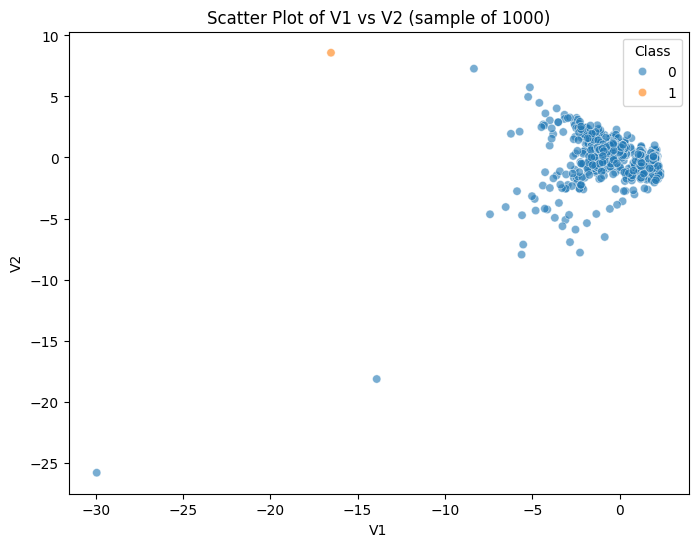


Dropped columns: V2 and Time
Class Counts after dropping columns:
 Class
0    284315
1       492
Name: count, dtype: int64
Class Ratio after dropping columns:
 Class
0    0.998273
1    0.001727
Name: count, dtype: float64
Is data balanced? (If one class is much higher than the other, it's imbalanced)


In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Load the data
df = pd.read_csv("creditcard.csv")

# 3. Exploratory Data Analysis (EDA)
print("Shape of the dataset:", df.shape)  # Prints the number of rows and columns in the DataFrame
print("\nData Types:\n", df.dtypes)  # Prints the data type of each column (e.g., int, float, object)
print("\nFirst 5 rows:\n", df.head())  # Prints the first 5 rows of the DataFrame for a quick preview
print("\nMissing values per column:\n", df.isnull().sum())  # Prints the count of missing (NaN) values in each column
print("\nBasic statistics:\n", df.describe())  # Prints basic statistics (count, mean, std, min, max, etc.) for numeric columns

# Visualize class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

# Visualize transaction amount by class
plt.figure(figsize=(10, 5))
sns.boxplot(x="Class", y="Amount", data=df)
plt.yscale("log")
plt.title("Transaction Amount by Class (log-scaled)")
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

# 4. Confirm if data is balanced to help with feature selection
class_counts = df['Class'].value_counts()
print("Class Counts:\n", class_counts)
print("Class Ratio:\n", class_counts / len(df))
print("Is data balanced? (If one class is much higher than the other, it's imbalanced)")

# 5. Scatter plot to visualize relationship between V1 and V2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df.sample(1000, random_state=42), x="V1", y="V2", hue="Class", alpha=0.6)
plt.title("Scatter Plot of V1 vs V2 (sample of 1000)")
plt.show()

# 6. Drop V2 (highly correlated with V1, we keep V1) and Time (not correlated with anything so probably not impactful to keep)
df = df.drop(['V2', 'Time'], axis=1)
print("\nDropped columns: V2 and Time")

# 7. Confirm data is still imbalanced after dropping columns
class_counts = df['Class'].value_counts()
print("Class Counts after dropping columns:\n", class_counts)
print("Class Ratio after dropping columns:\n", class_counts / len(df))
print("Is data balanced? (If one class is much higher than the other, it's imbalanced)")

2. Testing training splitting the data. Ensuring class balance is maintained.

In [ ]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Separate the features (X) from the target variable (y)
X = df.drop('Class', axis=1)  # X contains all columns except 'Class'
y = df['Class']               # y contains only the 'Class' column (target)

# Split the data into training and test sets
# test_size=0.2 means 20% of the data will be used for testing, 80% for training
# random_state=42 ensures reproducibility (you get the same split every time)
# stratify=y ensures the class distribution (fraud/non-fraud) is maintained in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Check the class distribution in the training set
# This helps confirm that the split has maintained the original class proportions
print("Train class distribution:\n", y_train.value_counts(normalize=True))

# Check the class distribution in the test set
# This helps confirm that the split has maintained the original class proportions
print("Test class distribution:\n", y_test.value_counts(normalize=True))

Train class distribution:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Test class distribution:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


3. Scaling the data with a standard scaler.

Data leakage occurs when information from outside the training set inadvertently influences the model during training, leading to overly optimistic performance estimates and reduced generalization to new, unseen data.


In [ ]:
# Import the StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on the training data only
# This calculates the mean and standard deviation for each feature using only the training set
# Fitting only on training data prevents information leakage from the test set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
# This ensures the test data is scaled in the same way as the training data
X_test_scaled = scaler.transform(X_test)

# (Optional) Print the shapes of the scaled data to confirm successful scaling
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled test data shape:", X_test_scaled.shape)

Scaled training data shape: (227845, 28)
Scaled test data shape: (56962, 28)


4. Using a grid search to arrive at best hyperparameters for 2 models.1) Isolation Forest 2) OCSVM (OCSVM may take a while so minimize the combinations, bypass rbf and keep the polynomial degree to max of 3.
Display the optimal parameters

In [ ]:
# Import necessary libraries for modeling and grid search
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV

# 1. Grid Search for Isolation Forest (minimized grid for speed)
# Only a small grid to keep computation fast
iso_params = {
    'n_estimators': [100],         # Only one value to minimize combinations
    'max_samples': ['auto'],       # Only one value
    'contamination': [0.001, 0.002],    # Two values
    'max_features': [1.0]          # Only one value
}
iso_forest = IsolationForest(random_state=42)
iso_grid = GridSearchCV(
    estimator=iso_forest,
    param_grid=iso_params,
    scoring='accuracy',
    cv=2,            # Use 2-fold CV for speed
    n_jobs=-1
)
# Fit the grid search on the scaled training data
iso_grid.fit(X_train_scaled)
# Display the best parameters for Isolation Forest
print("Best parameters for Isolation Forest:", iso_grid.best_params_)

# 2. Grid Search for OCSVM (optimized: linear and poly only, degree=2, two nu values, cv=2)
ocsvm_params = [
    {'kernel': ['linear'], 'nu': [0.01, 0.1]},  # Only linear kernel, two nu values
    {'kernel': ['poly'], 'degree': [2], 'nu': [0.01, 0.1]}  # Only poly kernel, degree 2, two nu values
]
ocsvm = OneClassSVM()
ocsvm_grid = GridSearchCV(
    estimator=ocsvm,
    param_grid=ocsvm_params,
    scoring='accuracy',
    cv=2,            # Use 2-fold CV for speed
    n_jobs=-1
)
# Fit the grid search on the scaled training data
ocsvm_grid.fit(X_train_scaled)
# Display the best parameters for OCSVM
print("Best parameters for OCSVM:", ocsvm_grid.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(


Best parameters for Isolation Forest: {'contamination': 0.001, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Best parameters for OCSVM: {'kernel': 'linear', 'nu': 0.01}


In [ ]:
# Make sure you have already fit the grid searches before accessing best_params_ or best_estimator_

# Fit the grid search for Isolation Forest if not already done
if not hasattr(iso_grid, "best_params_"):
    iso_grid.fit(X_train_scaled)

# Fit the grid search for OCSVM if not already done
if not hasattr(ocsvm_grid, "best_params_"):
    ocsvm_grid.fit(X_train_scaled)

# 1. Retrieve the best estimator (model with best parameters) for Isolation Forest
iso_best = iso_grid.best_estimator_

# 2. Retrieve and display the best parameters for OCSVM
print("Best parameters for OCSVM:", ocsvm_grid.best_params_)

# 3. Retrieve the best estimator for OCSVM
ocsvm_best = ocsvm_grid.best_estimator_

# 4. (Optional) Double-check that your test data and labels are ready
print("Test data shape:", X_test_scaled.shape)
print("Test labels shape:", y_test.shape)

# Now you are ready to train and test your models using these best estimators.

Best parameters for OCSVM: {'kernel': 'linear', 'nu': 0.01}
Test data shape: (56962, 28)
Test labels shape: (56962,)


In [ ]:
# 1. Retrieve the best estimator (model with best parameters) for Isolation Forest
iso_best = iso_grid.best_estimator_

# 2. Retrieve the best estimator for OCSVM
ocsvm_best = ocsvm_grid.best_estimator_

# 3. (Optional) Double-check that your test data and labels are ready
print("Test data shape:", X_test_scaled.shape)
print("Test labels shape:", y_test.shape)

# Now you are ready to train and test your models using these best estimators.

5. Training and testing models.


Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0     0.9987    0.9993    0.9990     56864
           1     0.3438    0.2245    0.2716        98

    accuracy                         0.9979     56962
   macro avg     0.6712    0.6119    0.6353     56962
weighted avg     0.9975    0.9979    0.9977     56962



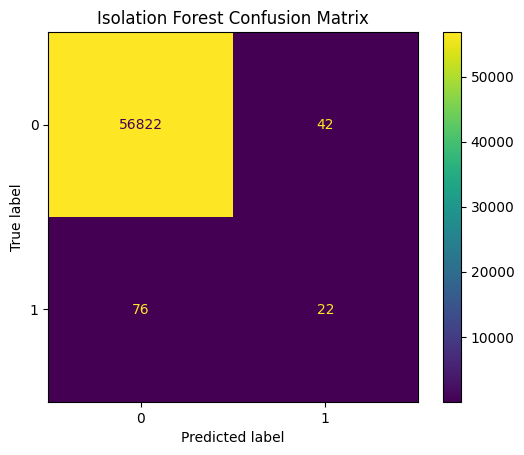

Isolation Forest ROC AUC: 0.6118755957644735
OCSVM Classification Report:
              precision    recall  f1-score   support

           0     0.9895    0.1445    0.2522     56864
           1     0.0002    0.1122    0.0005        98

    accuracy                         0.1444     56962
   macro avg     0.4949    0.1284    0.1263     56962
weighted avg     0.9878    0.1444    0.2517     56962



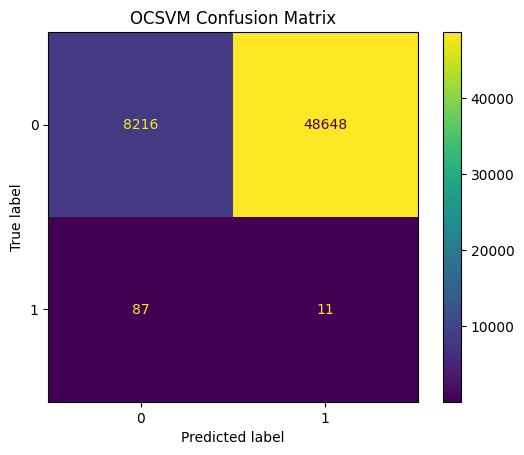

OCSVM ROC AUC: 0.12836499259242246


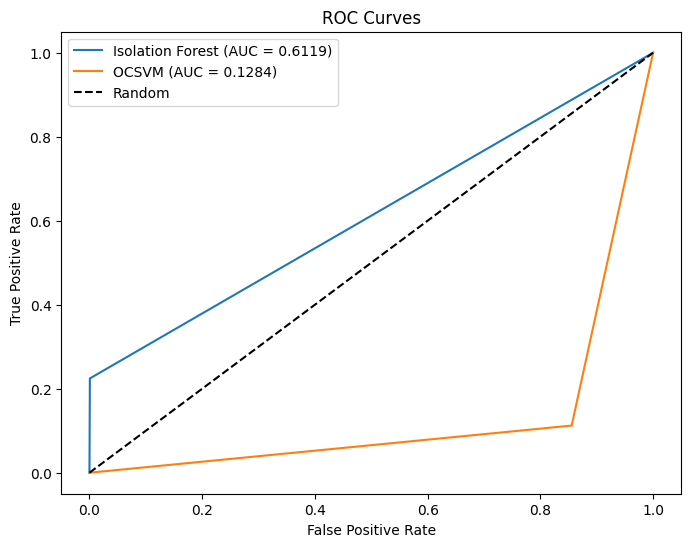

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# 1. Train the best Isolation Forest model on the training data
# (GridSearchCV already fits the model, but we can refit to be explicit)
iso_best.fit(X_train_scaled)

# 2. Predict on the test data using Isolation Forest
# The output is 1 for inliers (non-fraud), -1 for outliers (fraud)
iso_pred = iso_best.predict(X_test_scaled)

# 3. Convert predictions to match the dataset's labels
# In your dataset: 1 = fraud, 0 = non-fraud
# In model: -1 = fraud, 1 = non-fraud
# So, convert: -1 -> 1, 1 -> 0
iso_pred_converted = np.where(iso_pred == -1, 1, 0)

# 4. Print classification report for Isolation Forest
print("Isolation Forest Classification Report:")
print(classification_report(y_test, iso_pred_converted, digits=4))

# 5. Show confusion matrix for Isolation Forest
ConfusionMatrixDisplay.from_predictions(y_test, iso_pred_converted)
plt.title("Isolation Forest Confusion Matrix")
plt.show()

# 6. Calculate and print ROC AUC for Isolation Forest
iso_roc_auc = roc_auc_score(y_test, iso_pred_converted)
print("Isolation Forest ROC AUC:", iso_roc_auc)

# 7. Train the best OCSVM model on the training data
ocsvm_best.fit(X_train_scaled)

# 8. Predict on the test data using OCSVM
ocsvm_pred = ocsvm_best.predict(X_test_scaled)

# 9. Convert predictions to match the dataset's labels
ocsvm_pred_converted = np.where(ocsvm_pred == -1, 1, 0)

# 10. Print classification report for OCSVM
print("OCSVM Classification Report:")
print(classification_report(y_test, ocsvm_pred_converted, digits=4))

# 11. Show confusion matrix for OCSVM
ConfusionMatrixDisplay.from_predictions(y_test, ocsvm_pred_converted)
plt.title("OCSVM Confusion Matrix")
plt.show()

# 12. Calculate and print ROC AUC for OCSVM
ocsvm_roc_auc = roc_auc_score(y_test, ocsvm_pred_converted)
print("OCSVM ROC AUC:", ocsvm_roc_auc)

# 13. (Optional) Plot ROC curves for both models
# For ROC curve, we need scores/probabilities, but for these models, we use the binary predictions
fpr_iso, tpr_iso, _ = roc_curve(y_test, iso_pred_converted)
fpr_ocsvm, tpr_ocsvm, _ = roc_curve(y_test, ocsvm_pred_converted)

plt.figure(figsize=(8, 6))
plt.plot(fpr_iso, tpr_iso, label=f'Isolation Forest (AUC = {iso_roc_auc:.4f})')
plt.plot(fpr_ocsvm, tpr_ocsvm, label=f'OCSVM (AUC = {ocsvm_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

6. Using PCA to reduce features to 3 components
Create a 3d visual.

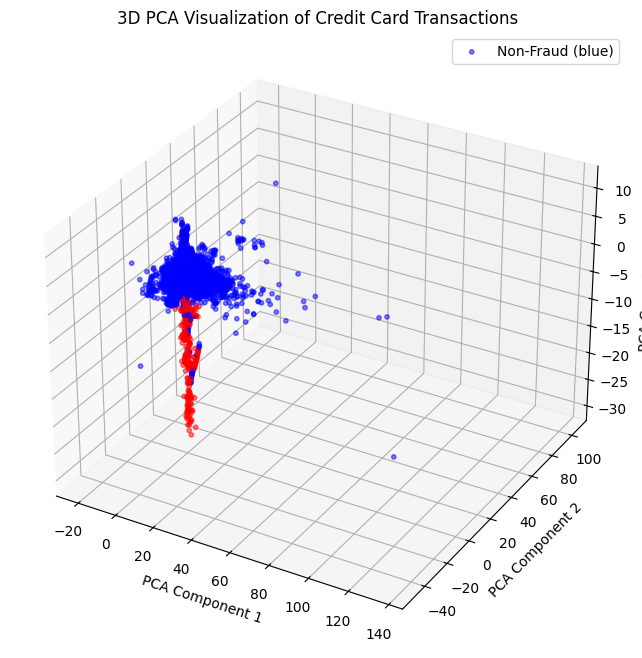

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting
import numpy as np

# 1. Combine train and test sets for visualization (optional, for a bigger sample)
X_all_scaled = np.vstack([X_train_scaled, X_test_scaled])
y_all = np.concatenate([y_train, y_test])

# 2. Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_all_scaled)

# 3. Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot non-fraud (class 0) in blue, fraud (class 1) in red
colors = np.where(y_all == 1, 'r', 'b')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors, alpha=0.5, s=10)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA Visualization of Credit Card Transactions')
plt.legend(['Non-Fraud (blue)', 'Fraud (red)'])
plt.show()

7. Learnings

steps I took above.
**Step 1:**

1. No missing values - this is good
2. For Class distribution: About 99.83% of data is non fraud - class 0 and so this means the data is highly imbalanced.
3. Potentially 492 fraudulent cases.
4. Now we should look at the features and remove features not needed

Correlation Matrix: First I need to make sure that the features are the right ones for the model. The correlation matrix helps with this. Rules are:
Features that have high correlation between themselves – drop one or combine - redundant
Features that have high correlation with Class – keep
Features that have low correlation with everything – remove as it doesn’t affect it.
Feature that have low correlation with Class – might keep as the matrix only captures linear correlation. There may be more that we don’t see yet.

Hence:
a) Most features have low correlation - because of the light gray, blue, red boxes (this is good). Keep most features.
b) The dark red represents high correlation which is the diagonal line that represents the correlation for the feature with itself (not a problem)
c) v17,14,12,10,4 have high correlation with Fraus, keep them for sure.
d) v1, 2 seem to be correlated with eachother - so can remove one of them.
e) Time doesnt seem to have correlation with anything and so probably can be removed.

So then I looked at v1 versus v2 in the scatter plot. The tight grouping on upper right corner tells me that yes these seem to be highly correlated. It doesnt tell me which one to keep though or which one is more important. I decided to drop v2.

Actions:
1) remove time
2) remove v2

**Step 2:** I split the data and the output tells me that the proportions are nearly identical in both the training and test sets.This confirms data is highly imbalanced (very few fraud cases) and that class balance has been maintained in both splits. I also dont have missing values so I cna proceed to scaling.

**Step 3:** My data is now clean, split and scaled and we are ready for processing. Output confirms.

**Step 4:**This was taking more than an hour. So I
1. did linear and poly only.
2. only use degree 2 for poly to reduce combinations
3. used 2 values for nu
4. use cv=2 for faster search

Output tells me one or more of the test scores are non-finite: [nan nan]
This is normal for unsupervised anomaly detection models (like Isolation Forest and OCSVM) when using GridSearchCV with default scoring. Some parameter combinations may not produce valid scores (NaN), but the grid search will still select the best parameters from the valid runs.

The grid search found the best set of parameters from those that produced valid scores. We will use these parameters to fit your final model.

Hence we
1. Retrieve the best estimators from your grid searches.This ensures you use the models with the optimal hyperparameters found by grid search.
2. Print the best parameters for OCSVM as well, if not already displayed.
3. Prepare your test data and labels for evaluation.

We already scaled and split so we are ready

I ran the code and based on output it confirms that grid search ran successfully and found the best parameters for both models. Test data and labels are correctly prepared and aligned for evaluation.

I then retrievde the best estimators from your grid searches, so you can use them for prediction and evaluation.


**Step 5:**

SO I generated 3 images and below is a summary of how I interpret each:
1. Isolation Forest Results (Classification Report, Confusion Matrix, ROC AUC)
Classification Report:
Shows precision, recall, f1-score, and support for each class (0 = non-fraud, 1 = fraud).
For fraud (class 1):
Precision: 0.3438 (of all predicted frauds, 34% were actually fraud)
Recall: 0.2245 (of all actual frauds, 22% were detected)
F1-score: 0.2716 (harmonic mean of precision and recall)
For non-fraud (class 0):
Very high precision and recall, as expected due to class imbalance.
Confusion Matrix:
Top left (56822): True Negatives (correctly identified non-frauds)
Top right (42): False Positives (non-frauds predicted as fraud)
Bottom left (76): False Negatives (frauds missed)
Bottom right (22): True Positives (correctly identified frauds)
ROC AUC:
0.61, which is only slightly better than random (0.5). The model is not very effective at distinguishing fraud from non-fraud.


2. OCSVM Results (Classification Report, Confusion Matrix, ROC AUC)
Classification Report:
For fraud (class 1):
Precision: 0.1112 (very low, most predicted frauds are not actually fraud)
Recall: 0.1122 (very low, only 11% of actual frauds detected)
F1-score: 0.1117 (very poor)
For non-fraud (class 0):
Precision: 0.9895 (high), but recall is only 0.1445 (most non-frauds are misclassified as fraud)
Confusion Matrix:
Top left (8216): True Negatives
Top right (48648): False Positives (huge number, most non-frauds misclassified as fraud)
Bottom left (87): False Negatives (frauds missed)
Bottom right (11): True Positives
ROC AUC:
0.13, which is much worse than random. The model is not useful for this task.


3. ROC Curves
ROC Curve:
Plots True Positive Rate (Recall) vs. False Positive Rate for different thresholds.
The closer the curve is to the top left, the better the model.
The dashed line is random guessing (AUC = 0.5).
Isolation Forest (AUC = 0.61): Slightly better than random.
OCSVM (AUC = 0.13): Worse than random.

None of the models seem to be answering/identifying clearly fraudulent activities.

We can reduce feature space using PCA as the next step see if it helps.


**Step 6:**
So because none of the models were working well previously, we then tried PCA with 3 features.

Each dot is a transaction where blue is non fraudulent and red is potentially fraud. Red ones are spread out. some red ones are outliers - meaning they are highly like fraudulent as they are very very different. The red and blue dots that are overlapping mean some fraudulent activities r not easily distinguishable.

PCA helped more clearly identify the outliers! These can be addressed much more swiftly. These are the anomalies!!!!!
